# yt-dev

## 2/16/17

Let's take T2Sampler2D for example. It is called in `pixelization_routines.pyx` by the `pixelize_element_mesh` function. The `pixelize_element_mesh` function is called in `cartesian_coordinates.py` by the `pixelize` function of the `CartesianCoordinateHandler` class. Here is backtrace for call to `pixelize` when asking for a `SlicePlot` from an exodus data set:
```
slc = yt.SlicePlot(ds, 'z', ('all','group1_lin'), origin="native")
  /home/al007/yt/yt/visualization/plot_window.py(2017) SlicePlot()
-> return AxisAlignedSlicePlot(ds, normal, fields, *args, **kwargs)
  /home/al007/yt/yt/visualization/plot_window.py(1334) AxisAlignedSlicePlot.__init__()
-> PWViewerMPL.__init__()
  /home/al007/yt/yt/visualization/plot_window.py(670) PWViewerMPL.__init__()
-> PlotWindow.__init__(self, *args, **kwargs)
  /home/al007/yt/yt/visualization/plot_window.py(223) PlotWindow.__init__()
-> self._setup_plots()
  /home/al007/yt/yt/visualization/plot_window.py(758) PWViewerMPL._setup_plots()
-> self._recreate_frb()
  /home/al007/yt/yt/visualization/plot_window.py(282) PlotWindow._recreate_frb()
-> self._frb._get_data_source_fields()
  /home/al007/yt/yt/visualization/fixed_resolution.py(156) FixedResolutionBuffer._get_data_source_fields()
-> self[f]
  /home/al007/yt/yt/visualization/fixed_resolution.py(135) FixedResolutionBuffer.__getitem__()
-> buff = self.ds.coordinates.pixelize(...)
> /home/al007/yt/yt/geometry/coordinates/cartesian_coordinates.py(68) CartesianCoordinatehandler.pixelize()
-> index = data_source.ds.index
```

Inheritance pattern for some of this plotting stuff:

AxisAlignedSlicePlot <- PWViewerMPL <- PlotWindow <- ImagePlotContainer <- object

WindowPlotMPL <- ImagePlotMPL <- PlotMPL <- object

In [ ]:
import numpy as np

start_point = np.array([1, 1, 1])
end_point = np.array([2, 3, 4])
resolution = 10
lin_sample_points = np.zeros((resolution + 1, 3))
arc_length = np.zeros(resolution + 1)

lin_vec = end_point - start_point
lin_length = np.linalg.norm(lin_vec)
lin_inc = lin_vec / resolution
inc_length = np.linalg.norm(lin_inc)
lin_sample_points[0] = start_point
arc_length[0] = 0
for i in range(1, resolution + 1):
    lin_sample_points[i] = lin_sample_points[i-1] + lin_inc
    arc_length[i] = arc_length[i-1] + inc_length

print(lin_sample_points)
print(arc_length)

In [ ]:
print(lin_length)

# 2/17/17

yt : [WARNING  ] 2017-02-17 19:49:16,061 name_glo_var not found
yt : [WARNING  ] 2017-02-17 19:49:16,187 name_elem_var not found
yt : [INFO     ] 2017-02-17 19:49:16,189 Loading coordinates
yt : [INFO     ] 2017-02-17 19:49:16,192 Loading connectivity
yt : [INFO     ] 2017-02-17 19:49:16,205 Parameters: current_time              = 10000.0
yt : [INFO     ] 2017-02-17 19:49:16,205 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2017-02-17 19:49:16,207 Parameters: domain_left_edge          = [ -0.573 -11.5     0.   ]
yt : [INFO     ] 2017-02-17 19:49:16,210 Parameters: domain_right_edge         = [   6.303  126.5      1.   ]
yt : [INFO     ] 2017-02-17 19:49:16,211 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2017-02-17 19:49:16,213 Loading coordinates
yt : [INFO     ] 2017-02-17 19:49:16,215 Loading connectivity
yt : [WARNING  ] 2017-02-17 19:49:16,219 name_elem_var not found


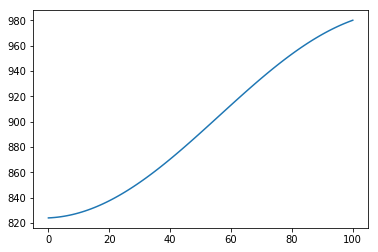

In [2]:
data_dir = "/home/lindsayad/Dropbox/moltres_output/"
import yt
ds = yt.load(data_dir + "020617_mod_heat_source_one_minus_beta_fission.e", step=-1)

from yt.geometry.coordinates.cartesian_coordinates import CartesianCoordinateHandler

handler = CartesianCoordinateHandler(ds)

arc_length, temp_values = handler.line_plot(('all', 'temp'), np.array([1., 0., 0.]), np.array([1., 100., 0.]), 100)
import numpy as np
import matplotlib.pyplot as plt
plt.plot(arc_length, temp_values)
plt.show()

In [3]:
if not False and True:
    print("Hey")

Hey


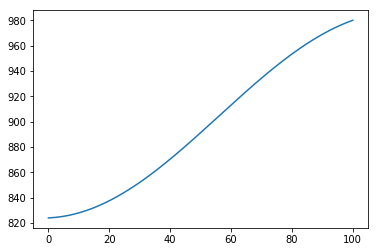

In [3]:
arc_length, temp_values = handler.line_plot([('all', 'temp')], np.array([1., 0., 0.]), np.array([1., 100., 0.]), 10000)
plt.plot(arc_length, temp_values)
plt.show()

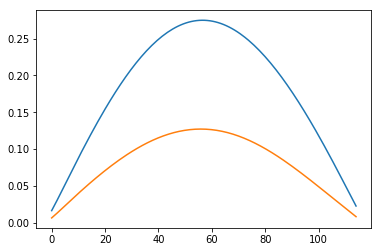

In [5]:
arc_length, group1_values = handler.line_plot([('all', 'group1_lin')], np.array([0., 0., 0.]), np.array([0., 114., 0.]), 10000)
arc_length, group2_values = handler.line_plot([('all', 'group2_lin')], np.array([0., 0., 0.]), np.array([0., 114., 0.]), 10000)
plt.plot(arc_length, group1_values, arc_length, group2_values)
plt.show()

In [6]:
r = (1, 1, 1)

In [7]:
x, y, z = r

In [8]:
print(x, y, z)

1 1 1


# 3/2/17

In [ ]:
import yt
import matplotlib.animation as anim
from matplotlib.backends.backend_agg import FigureCanvasAgg
!cd /home/lindsayad/data-yt/MOOSE_sample_data/
filename = "MOOSE_sample_data/mps_out.e"
center = [ 0., 0.02828897, -0.0023749 ]
slc = yt.SlicePlot(yt.load(filename, step=0), 'z', [('all', 'temp')], center=center)
slc.set_log(('all', 'temp'), False)
slc.set_zlim(('all', 'temp'), 530, 1640)
fig = slc.plots[('all', 'temp')].figure
fig.canvas = FigureCanvasAgg(fig)
def animate(i):
    ds_i = yt.load(filename, step=i)
    sl = ds_i.slice(2, 0, center=center)
    slc.data_source = sl
    slc.set_log(('all', 'temp'), False)
    slc.set_zlim(('all', 'temp'), 530, 1640)
    #print(slc.get_log(('all','temp')))
    slc.refresh()
    #slc.show()
    
temp_ani = anim.FuncAnimation(fig, animate, frames=25, interval=100, blit=False)
temp_ani.save('temp_animation.mp4')

yt : [INFO     ] 2017-03-02 18:26:57,856 Loading coordinates
yt : [INFO     ] 2017-03-02 18:26:57,908 Loading connectivity
yt : [INFO     ] 2017-03-02 18:26:57,955 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-02 18:26:57,955 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2017-03-02 18:26:57,969 Parameters: domain_left_edge          = [-0.00569976 -0.00565779 -0.00522478]
yt : [INFO     ] 2017-03-02 18:26:57,971 Parameters: domain_right_edge         = [ 0.00569976  0.06223573  0.00047498]
yt : [INFO     ] 2017-03-02 18:26:57,972 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2017-03-02 18:26:57,973 Loading coordinates
yt : [INFO     ] 2017-03-02 18:26:57,984 Loading connectivity
yt : [INFO     ] 2017-03-02 18:26:58,276 xlim = -0.005700 0.005700
yt : [INFO     ] 2017-03-02 18:26:58,276 ylim = -0.005658 0.062236
yt : [INFO     ] 2017-03-02 18:26:58,278 xlim = -0.005700 0.005700
yt : [INFO     ] 2017-03-02 18:26:58,280 ylim = -0.005658 

In [32]:
ds = yt.load(filename)
ds.num_steps

yt : [INFO     ] 2017-03-03 08:32:44,994 Loading coordinates
yt : [INFO     ] 2017-03-03 08:32:45,000 Loading connectivity
yt : [INFO     ] 2017-03-03 08:32:45,018 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-03 08:32:45,019 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2017-03-03 08:32:45,020 Parameters: domain_left_edge          = [-0.00569976 -0.00565779 -0.00522478]
yt : [INFO     ] 2017-03-03 08:32:45,021 Parameters: domain_right_edge         = [ 0.00569976  0.06223573  0.00047498]
yt : [INFO     ] 2017-03-03 08:32:45,022 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2017-03-03 08:32:45,023 Loading coordinates
yt : [INFO     ] 2017-03-03 08:32:45,029 Loading connectivity


127

In [33]:
import yt

!cd /home/lindsayad/data-yt/MOOSE_sample_data/
filename = "MOOSE_sample_data/mps_out.e"
ds = yt.load(filename)
num_steps = ds.num_steps
center = [ 0., 0.02828897, -0.0023749 ]
slc = yt.SlicePlot(yt.load(filename, step=0), 'z', [('all', 'temp')], center=center)
slc.set_log(('all', 'temp'), False)
slc.set_zlim(('all', 'temp'), 530, 1640)
slc.save("slc_step0.png")
for i in range(1,num_steps):
    #slc = yt.SlicePlot(yt.load(filename, step=i), 'z', [('all', 'temp')], center=center)
    ds_i = yt.load(filename, step=i)
    slc._switch_ds(ds_i)
    slc.save("slc_step" + str(i) + ".png")

yt : [INFO     ] 2017-03-03 08:35:26,978 Loading coordinates
yt : [INFO     ] 2017-03-03 08:35:26,986 Loading connectivity
yt : [INFO     ] 2017-03-03 08:35:27,013 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-03 08:35:27,014 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2017-03-03 08:35:27,016 Parameters: domain_left_edge          = [-0.00569976 -0.00565779 -0.00522478]
yt : [INFO     ] 2017-03-03 08:35:27,017 Parameters: domain_right_edge         = [ 0.00569976  0.06223573  0.00047498]
yt : [INFO     ] 2017-03-03 08:35:27,018 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2017-03-03 08:35:27,020 Loading coordinates
yt : [INFO     ] 2017-03-03 08:35:27,029 Loading connectivity
yt : [INFO     ] 2017-03-03 08:35:27,456 Loading coordinates
yt : [INFO     ] 2017-03-03 08:35:27,463 Loading connectivity
yt : [INFO     ] 2017-03-03 08:35:27,481 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-03 08:35:27,482 Parameters

In [35]:
print("You're a big old dodo. Here's a number for you: %03d and here's another after that %04d" % (8, 120))

You're a big old dodo. Here's a number for you: 008 and here's another after that 0120


In [36]:
import yt

!cd /home/lindsayad/data-yt/MOOSE_sample_data/
filename = "MOOSE_sample_data/mps_out.e"
ds = yt.load(filename)
num_steps = ds.num_steps
center = [ 0., 0.02828897, -0.0023749 ]
slc = yt.SlicePlot(yt.load(filename, step=0), 'z', [('all', 'temp')], center=center)
slc.set_log(('all', 'temp'), False)
slc.set_zlim(('all', 'temp'), 530, 1640)
slc.save("slc_step000.png")
for i in range(num_steps):
    ds_i = yt.load(filename, step=i)
    slc._switch_ds(ds_i)
    slc.save("slc_step_test%03d.png" % i)

yt : [INFO     ] 2017-03-03 09:45:16,726 Loading coordinates
yt : [INFO     ] 2017-03-03 09:45:16,734 Loading connectivity
yt : [INFO     ] 2017-03-03 09:45:16,765 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-03 09:45:16,766 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2017-03-03 09:45:16,768 Parameters: domain_left_edge          = [-0.00569976 -0.00565779 -0.00522478]
yt : [INFO     ] 2017-03-03 09:45:16,770 Parameters: domain_right_edge         = [ 0.00569976  0.06223573  0.00047498]
yt : [INFO     ] 2017-03-03 09:45:16,772 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2017-03-03 09:45:16,774 Loading coordinates
yt : [INFO     ] 2017-03-03 09:45:16,782 Loading connectivity
yt : [INFO     ] 2017-03-03 09:45:17,124 Loading coordinates
yt : [INFO     ] 2017-03-03 09:45:17,130 Loading connectivity
yt : [INFO     ] 2017-03-03 09:45:17,148 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-03 09:45:17,149 Parameters

In [30]:
fig = slc.plots[('all', 'temp')].figure
fig.canvas = FigureCanvasAgg(fig)
def animate(i):
    ds_i = yt.load(filename, step=i)
    slc._switch_ds(ds_i)
    slc.refresh()
    
temp_ani = anim.FuncAnimation(fig, animate, frames=25, interval=100, blit=False)
temp_ani.save('temp_animation.mp4')

yt : [INFO     ] 2017-03-03 08:08:01,812 Loading coordinates
yt : [INFO     ] 2017-03-03 08:08:01,852 Loading connectivity
yt : [INFO     ] 2017-03-03 08:08:01,888 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-03 08:08:01,889 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2017-03-03 08:08:01,904 Parameters: domain_left_edge          = [-0.00569976 -0.00565779 -0.00522478]
yt : [INFO     ] 2017-03-03 08:08:01,906 Parameters: domain_right_edge         = [ 0.00569976  0.06223573  0.00047498]
yt : [INFO     ] 2017-03-03 08:08:01,907 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2017-03-03 08:08:01,924 Loading coordinates
yt : [INFO     ] 2017-03-03 08:08:01,933 Loading connectivity
yt : [INFO     ] 2017-03-03 08:08:02,177 xlim = -0.005700 0.005700
yt : [INFO     ] 2017-03-03 08:08:02,177 ylim = -0.005658 0.062236
yt : [INFO     ] 2017-03-03 08:08:02,179 xlim = -0.005700 0.005700
yt : [INFO     ] 2017-03-03 08:08:02,180 ylim = -0.005658 

In [1]:
help(property)

Help on class property in module builtins:

class property(object)
 |  property(fget=None, fset=None, fdel=None, doc=None) -> property attribute
 |  
 |  fget is a function to be used for getting an attribute value, and likewise
 |  fset is a function for setting, and fdel a function for del'ing, an
 |  attribute.  Typical use is to define a managed attribute x:
 |  
 |  class C(object):
 |      def getx(self): return self._x
 |      def setx(self, value): self._x = value
 |      def delx(self): del self._x
 |      x = property(getx, setx, delx, "I'm the 'x' property.")
 |  
 |  Decorators make defining new properties or modifying existing ones easy:
 |  
 |  class C(object):
 |      @property
 |      def x(self):
 |          "I am the 'x' property."
 |          return self._x
 |      @x.setter
 |      def x(self, value):
 |          self._x = value
 |      @x.deleter
 |      def x(self):
 |          del self._x
 |  
 |  Methods defined here:
 |  
 |  __delete__(self, instance, /)
 |  

In [2]:
import builtins

In [16]:
import yt

In [22]:
sys.builtin_module_names

('_ast',
 '_codecs',
 '_collections',
 '_functools',
 '_imp',
 '_io',
 '_locale',
 '_operator',
 '_signal',
 '_sre',
 '_stat',
 '_string',
 '_symtable',
 '_thread',
 '_tracemalloc',
 '_warnings',
 '_weakref',
 'atexit',
 'builtins',
 'errno',
 'faulthandler',
 'gc',
 'itertools',
 'marshal',
 'posix',
 'pwd',
 'sys',
 'time',
 'xxsubtype',
 'zipimport')

In [21]:
help(sys.builtin_module_names)

Help on tuple object:

class tuple(object)
 |  tuple() -> empty tuple
 |  tuple(iterable) -> tuple initialized from iterable's items
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __getnewargs__(...)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __len__(self, /)
 |      Return len(self).
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  _

In [29]:
help(sys.path)

Help on list object:

class list(object)
 |  list() -> new empty list
 |  list(iterable) -> new list initialized from iterable's items
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /

In [20]:
dir(sys)

['__displayhook__',
 '__doc__',
 '__excepthook__',
 '__interactivehook__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__stderr__',
 '__stdin__',
 '__stdout__',
 '_clear_type_cache',
 '_current_frames',
 '_debugmallocstats',
 '_getframe',
 '_home',
 '_mercurial',
 '_xoptions',
 'abiflags',
 'api_version',
 'argv',
 'base_exec_prefix',
 'base_prefix',
 'builtin_module_names',
 'byteorder',
 'call_tracing',
 'callstats',
 'copyright',
 'displayhook',
 'dont_write_bytecode',
 'exc_info',
 'excepthook',
 'exec_prefix',
 'executable',
 'exit',
 'flags',
 'float_info',
 'float_repr_style',
 'get_coroutine_wrapper',
 'getallocatedblocks',
 'getcheckinterval',
 'getdefaultencoding',
 'getdlopenflags',
 'getfilesystemencoding',
 'getprofile',
 'getrecursionlimit',
 'getrefcount',
 'getsizeof',
 'getswitchinterval',
 'gettrace',
 'hash_info',
 'hexversion',
 'implementation',
 'int_info',
 'intern',
 'is_finalizing',
 'last_traceback',
 'last_type',
 'last_value',
 'maxsize',
 'ma

In [23]:
import os

In [24]:
dir(os)

['CLD_CONTINUED',
 'CLD_DUMPED',
 'CLD_EXITED',
 'CLD_TRAPPED',
 'EX_CANTCREAT',
 'EX_CONFIG',
 'EX_DATAERR',
 'EX_IOERR',
 'EX_NOHOST',
 'EX_NOINPUT',
 'EX_NOPERM',
 'EX_NOUSER',
 'EX_OK',
 'EX_OSERR',
 'EX_OSFILE',
 'EX_PROTOCOL',
 'EX_SOFTWARE',
 'EX_TEMPFAIL',
 'EX_UNAVAILABLE',
 'EX_USAGE',
 'F_LOCK',
 'F_OK',
 'F_TEST',
 'F_TLOCK',
 'F_ULOCK',
 'MutableMapping',
 'NGROUPS_MAX',
 'O_ACCMODE',
 'O_APPEND',
 'O_ASYNC',
 'O_CLOEXEC',
 'O_CREAT',
 'O_DIRECT',
 'O_DIRECTORY',
 'O_DSYNC',
 'O_EXCL',
 'O_LARGEFILE',
 'O_NDELAY',
 'O_NOATIME',
 'O_NOCTTY',
 'O_NOFOLLOW',
 'O_NONBLOCK',
 'O_RDONLY',
 'O_RDWR',
 'O_RSYNC',
 'O_SYNC',
 'O_TRUNC',
 'O_WRONLY',
 'POSIX_FADV_DONTNEED',
 'POSIX_FADV_NOREUSE',
 'POSIX_FADV_NORMAL',
 'POSIX_FADV_RANDOM',
 'POSIX_FADV_SEQUENTIAL',
 'POSIX_FADV_WILLNEED',
 'PRIO_PGRP',
 'PRIO_PROCESS',
 'PRIO_USER',
 'P_ALL',
 'P_NOWAIT',
 'P_NOWAITO',
 'P_PGID',
 'P_PID',
 'P_WAIT',
 'RTLD_DEEPBIND',
 'RTLD_GLOBAL',
 'RTLD_LAZY',
 'RTLD_LOCAL',
 'RTLD_NODELETE',
 '

In [25]:
help(os.path)

Help on module posixpath:

NAME
    posixpath - Common operations on Posix pathnames.

MODULE REFERENCE
    https://docs.python.org/3.5/library/posixpath.html
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    Instead of importing this module directly, import os and refer to
    this module as os.path.  The "os.path" name is an alias for this
    module on Posix systems; on other systems (e.g. Mac, Windows),
    os.path provides the same operations in a manner specific to that
    platform, and is an alias to another module (e.g. macpath, ntpath).
    
    Some of this can actually be useful on non-Posix systems too, e.g.
    for manipulation of the pathname component of URLs.

FUNCTIONS
    abspath(

In [19]:
help(help)

Help on _Helper in module _sitebuiltins object:

class _Helper(builtins.object)
 |  Define the builtin 'help'.
 |  
 |  This is a wrapper around pydoc.help that provides a helpful message
 |  when 'help' is typed at the Python interactive prompt.
 |  
 |  Calling help() at the Python prompt starts an interactive help session.
 |  Calling help(thing) prints help for the python object 'thing'.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, *args, **kwds)
 |      Call self as a function.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [18]:
dir(property)

['__class__',
 '__delattr__',
 '__delete__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__isabstractmethod__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__set__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'deleter',
 'fdel',
 'fget',
 'fset',
 'getter',
 'setter']

In [17]:
help(yt.SlicePlot)

Help on function SlicePlot in module yt.visualization.plot_window:

SlicePlot(ds, normal=None, fields=None, axis=None, *args, **kwargs)
    A factory function for
    :class:`yt.visualization.plot_window.AxisAlignedSlicePlot`
    and :class:`yt.visualization.plot_window.OffAxisSlicePlot` objects.  This
    essentially allows for a single entry point to both types of slice plots,
    the distinction being determined by the specified normal vector to the
    slice.
    
    The returned plot object can be updated using one of the many helper
    functions defined in PlotWindow.
    
    Parameters
    ----------
    
    ds : :class:`yt.data_objects.api.Dataset`
        This is the dataset object corresponding to the
        simulation output to be plotted.
    normal : int or one of 'x', 'y', 'z', or sequence of floats
        This specifies the normal vector to the slice.  If given as an integer
        or a coordinate string (0=x, 1=y, 2=z), this function will return an
        :class

In [4]:
dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIteration',
 'SyntaxError',


In [7]:
builtins.__spec__

ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>)

In [8]:
import sys

In [15]:
help(property)

Help on class property in module builtins:

class property(object)
 |  property(fget=None, fset=None, fdel=None, doc=None) -> property attribute
 |  
 |  fget is a function to be used for getting an attribute value, and likewise
 |  fset is a function for setting, and fdel a function for del'ing, an
 |  attribute.  Typical use is to define a managed attribute x:
 |  
 |  class C(object):
 |      def getx(self): return self._x
 |      def setx(self, value): self._x = value
 |      def delx(self): del self._x
 |      x = property(getx, setx, delx, "I'm the 'x' property.")
 |  
 |  Decorators make defining new properties or modifying existing ones easy:
 |  
 |  class C(object):
 |      @property
 |      def x(self):
 |          "I am the 'x' property."
 |          return self._x
 |      @x.setter
 |      def x(self, value):
 |          self._x = value
 |      @x.deleter
 |      def x(self):
 |          del self._x
 |  
 |  Methods defined here:
 |  
 |  __delete__(self, instance, /)
 |  

In [12]:
sys.path

['',
 '/opt/moose/llvm-3.9.0/bindings/python',
 '/home/lindsayad/miniconda2/envs/yt-devel/lib/python35.zip',
 '/home/lindsayad/miniconda2/envs/yt-devel/lib/python3.5',
 '/home/lindsayad/miniconda2/envs/yt-devel/lib/python3.5/plat-linux',
 '/home/lindsayad/miniconda2/envs/yt-devel/lib/python3.5/lib-dynload',
 '/home/lindsayad/miniconda2/envs/yt-devel/lib/python3.5/site-packages',
 '/home/lindsayad/miniconda2/envs/yt-devel/lib/python3.5/site-packages/openmc-0.7.1-py3.5.egg',
 '/home/lindsayad/miniconda2/envs/yt-devel/lib/python3.5/site-packages/h5py-2.6.0-py3.5-linux-x86_64.egg',
 '/home/lindsayad/miniconda2/envs/yt-devel/lib/python3.5/site-packages/pymc3-3.0-py3.5.egg',
 '/home/lindsayad/miniconda2/envs/yt-devel/lib/python3.5/site-packages/numpydoc-0.6.0-py3.5.egg',
 '/home/lindsayad/miniconda2/envs/yt-devel/lib/python3.5/site-packages/nbsphinx-0.2.9-py3.5.egg',
 '/home/lindsayad/miniconda2/envs/yt-devel/lib/python3.5/site-packages/Sphinx-1.4.6-py3.5.egg',
 '/home/lindsayad/miniconda2/e

In [10]:
help(sys.path)

Help on list object:

class list(object)
 |  list() -> new empty list
 |  list(iterable) -> new list initialized from iterable's items
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /

In [9]:
dir(sys)

['__displayhook__',
 '__doc__',
 '__excepthook__',
 '__interactivehook__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__stderr__',
 '__stdin__',
 '__stdout__',
 '_clear_type_cache',
 '_current_frames',
 '_debugmallocstats',
 '_getframe',
 '_home',
 '_mercurial',
 '_xoptions',
 'abiflags',
 'api_version',
 'argv',
 'base_exec_prefix',
 'base_prefix',
 'builtin_module_names',
 'byteorder',
 'call_tracing',
 'callstats',
 'copyright',
 'displayhook',
 'dont_write_bytecode',
 'exc_info',
 'excepthook',
 'exec_prefix',
 'executable',
 'exit',
 'flags',
 'float_info',
 'float_repr_style',
 'get_coroutine_wrapper',
 'getallocatedblocks',
 'getcheckinterval',
 'getdefaultencoding',
 'getdlopenflags',
 'getfilesystemencoding',
 'getprofile',
 'getrecursionlimit',
 'getrefcount',
 'getsizeof',
 'getswitchinterval',
 'gettrace',
 'hash_info',
 'hexversion',
 'implementation',
 'int_info',
 'intern',
 'is_finalizing',
 'maxsize',
 'maxunicode',
 'meta_path',
 'modules',
 'path',
 '

In [3]:
help(builtins)

Help on built-in module builtins:

NAME
    builtins - Built-in functions, exceptions, and other objects.

DESCRIPTION
    Noteworthy: None is the `nil' object; Ellipsis represents `...' in slices.

CLASSES
    object
        BaseException
            Exception
                ArithmeticError
                    FloatingPointError
                    OverflowError
                    ZeroDivisionError
                AssertionError
                AttributeError
                BufferError
                EOFError
                ImportError
                LookupError
                    IndexError
                    KeyError
                MemoryError
                NameError
                    UnboundLocalError
                OSError
                    BlockingIOError
                    ChildProcessError
                    ConnectionError
                        BrokenPipeError
                        ConnectionAbortedError
                        ConnectionRefusedError
    